# The IS-MP Model

This note illustrates how to code a closed-economy IS-MP model in Python. First, I outline the IS-MP model and explore potential scenarios. This note is based from *Short Run Fluctuations* by Romer (2018).

## The IS Curve

The IS Curve equation is obtained via the well-known equilibrium condition where output, $Y$ is a function of spending: 

$$output = f(spending)$$

$$Y = C + I + G$$

Since this is a closed-economy model, net exports are ignored. The set of equations below define the components of $Y$.

The consumption function is a Keynesian consumption function: 

$$(eq.1) \quad C = \bar{C} + \alpha(Y-T)$$

where $\bar{C}$ is the level of autonomous consumption, $\bar{C}\geq0$. $\alpha$ is the marginal propensity to consume (MPC), $0< \alpha < 1$. 

Next, assume that the investment is a linear function: 

$$(eq.2) \quad I = \bar{I} - di$$

where $\bar{I}$ is the intercept when $i = 0$. $d$ represents sensitivity of Investment is to increases in the real interest rate, $i$, note that $i\geq0$. 

Note that $T=\bar{T}$ and $G=\bar{G}$ and are therefore, exogenous. Then, we obtain the IS curve by substituting $(eq.1)$, $(eq.2)$, $\bar{T}$, and $\bar{G}$ into the equilibrium condition and solving for $Y$:

$$Y = \bar{C} + \alpha(Y-T) + \bar{I} - di + \bar{G}$$

$$Y = \dfrac{1}{1-\alpha}(\bar{C} + \bar{I} - \alpha \bar{T} - di + \bar{G})$$

In order to plot the IS curve, I solved for $i$ from the equilibrium condition:

$$i_{IS} = \dfrac{(\bar{C} + \bar{I} - \alpha \bar{T} + \bar{G})}{d}-\dfrac{Y(1-\alpha)}{d}$$

(0.0, 67.14285714285714, 0.0, 11.75)

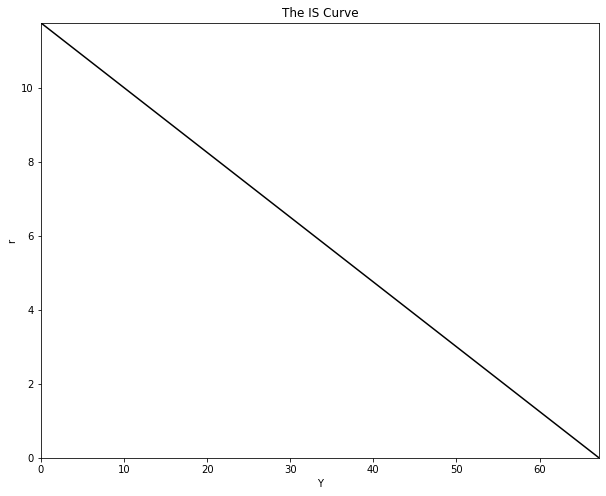

In [80]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

"1. IS Curve"
# Define the parameters for the IS curve
t = 10 # tax level
mpc = 0.3 # marginal propensity to consume
c_bar = 15 # autonomous consumption
i_bar = 15 # investment when i = 0
g = 20 # government expenditures
d = 4 # interest rate sensitivity of Investment
Y_max = 100 # max level of output
Y = np.arange(Y_max+1) # Numpy array for Y

# define the class for IS
class IS_curve:
    def __init__(self, 
                 t=0, 
                 mpc=0, 
                 c_bar=0, 
                 i_bar=0,
                 g=0,
                 d=0,
                 Y=0): 
        self.t = t
        self.c_bar = c_bar
        self.i_bar = i_bar
        self.g = g
        self.d = d
        self.Y = Y
        if 0 < n_y < 1:
            self.mpc = mpc
        else:
            raise ValueError("mpc must be between 0 and 1.")
    def i_arrays_IS(self):
        """
        Solves for array of i 
        """
        i_IS = ((self.c_bar + self.i_bar - self.mpc*self.t + self.g) - (Y*(1-self.mpc)))/d
        return i_IS
    
    def y_lv_IS(self, i=0):
        """
        Solves for level of Y given i
        """
        y_lv = (1/(1-self.mpc))*(self.c_bar + self.i_bar - self.mpc*self.t + self.d*i + self.g)
        return y_lv
    
IS = IS_curve(t, mpc, c_bar, i_bar, g, d, Y)
i_IS = IS.i_arrays_IS() # call i_arrays to obtain arrays for plotting
y_max = np.max(i_IS)
x_max = IS.y_lv_IS(0) # obtain level of Y where i = 0

# plot the IS curve
axes_range = [0, x_max, 0, y_max] # Set the axes range
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="The IS Curve", xlabel=r'Y', ylabel=r'r')
ax.plot(Y, i_IS, "k-")
plt.axis(axes_range)

## The MP Curve

The MP curve is a function that is increasing in $Y$.

$$i_{MP} = i(Y)$$

The MP curve follows a re-arranged Fisher equation with a simplified Taylor rule, plus an intercept term, $\bar{a}$:

$$i_{MP} = \bar{a} + r^{Taylor}$$

Where:

$$r^{Taylor} = \gamma + \bar{n}_{Y}Y + \bar{n}_{\pi}\pi$$

$\bar{n}_{\pi}$ is the central bank's responsiveness to inflation, $0< \bar{n}_{\pi} < 1$. $\bar{n}_{Y}$ is the central bank responsiveness to the level of output, $0< \bar{n}_{Y}< 1$. Lastly, $\gamma$ is the marginal product of capital, $0< \gamma< 1$.

(0.0, 100.0, 0.0, 52.5)

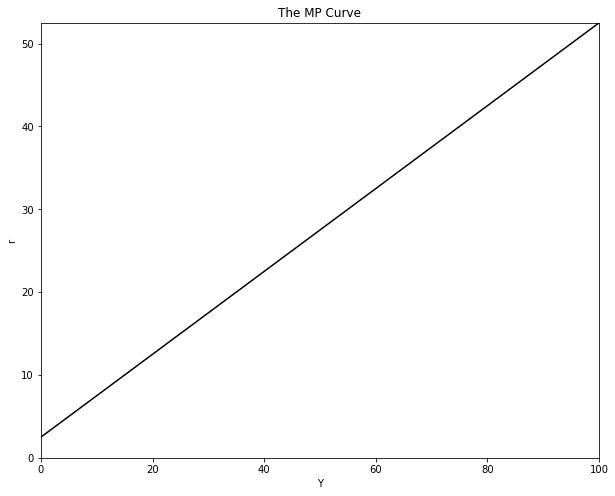

In [143]:
"2. MP Curve"
# set parameters
Y_max = 100 # max level of output
Y = np.arange(Y_max+1) # Numpy array for Y
a = 1 # intercept term
gamma = 0.5 # marginal product of capital
n_y = 0.5 # policymaker response to the level of Y
n_pi = 0.5 # policymaker response to the level of pi
pi = 2 # price level

class MP_curve:
    def __init__(self, 
                a=0,
                gamma=0,
                n_y=0,
                n_pi=0,
                pi=0,
                Y=0):
        self.a = a
        self.gamma = gamma
        self.Y = Y
        self.pi = pi
        # raise a ValueError if n is not between zero and one;
        if 0 < n_y < 1:
            self.n_y = n_y
        else:
            raise ValueError("n_y must be between 0 and 1.")
        # raise a ValueError if n_pi is not between zero and one;
        if 0 < n_pi < 1:
            self.n_pi = n_pi
        else:
            raise ValueError("n_pi must be between 0 and 1.")
            
    def i_arrays_MP(self):
        """
        Solves for array of i 
        """
        i_MP = self.a + (self.gamma + self.n_y*(self.Y) + self.n_pi*(self.pi))
        return i_MP
    
    def y_lv_MP(self, i=0):
        """
        Solves for level of Y given i
        """
        y_lv = -1*(self.a + self.gamma + self.n_pi*(self.pi) - i)/self.n_y
        return y_lv

MP = MP_curve(a, gamma, n_y, n_pi, pi, Y) 
i_MP = MP.i_arrays_MP() # call i_arrays to obtain arrays for plotting

x_max = np.max(Y)
y_max = np.max(i_MP)

v = [0, x_max, 0, y_max] # Set the axes range
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="The MP Curve", xlabel=r'Y', ylabel=r'r')
ax.plot(Y, i_MP, "k-")
plt.axis(v) 

# The Equilibrium Condition

The equilibrium condition is defined as:

$$i_{MP}=i_{IS}$$

At the equilibrium, planned expenditure equals output. In addition, the central bank is choosing the interest rate in accordance to the policy rule. $Y^{*}$ is determined by inserting the formulas in the equilibrium condition and solving for $Y$.

$$i_{MP}=i_{IS}$$

$$\bar{a} + \gamma + \bar{n}_{Y}Y + \bar{n}_{\pi}\pi=\dfrac{(\bar{C} + \bar{I} - \alpha \bar{T} + \bar{G})}{d}-\dfrac{Y(1-\alpha)}{d}$$

$$\bar{n}_{Y}Y + \dfrac{Y(1-\alpha)}{d} =\dfrac{(\bar{C} + \bar{I} - \alpha \bar{T} + \bar{G})}{d}-\bar{n}_{\pi}\pi-\bar{a} -\gamma$$

$$Y(\bar{n}_{Y} + \dfrac{(1-\alpha)}{d}) =\dfrac{(\bar{C} + \bar{I} - \alpha \bar{T} + \bar{G})}{d}-\bar{n}_{\pi}\pi-\bar{a} -\gamma$$

$$Y^{*} =\dfrac{\dfrac{(\bar{C} + \bar{I} - \alpha \bar{T} + \bar{G})}{d}-\bar{n}_{\pi}\pi-\bar{a} -\gamma}{(\bar{n}_{Y} + \dfrac{(1-\alpha)}{d})}$$

The equilibrium real interest rate is then solved by inserting $Y^{*}$ into the MP curve equation.

$$i^{*} = \bar{a} + \gamma + \bar{n}_{Y}Y^{*} + \bar{n}_{\pi}\pi$$

$$i^{*} = \bar{a} + \gamma + \bar{n}_{Y}\dfrac{\dfrac{(\bar{C} + \bar{I} - \alpha \bar{T} + \bar{G})}{d}-\bar{n}_{\pi}\pi-\bar{a} -\gamma}{(\bar{n}_{Y} + \dfrac{(1-\alpha)}{d})} + \bar{n}_{\pi}\pi$$

I used a class with static methods to contain the equations for solving the equilibrium output and interest rate. The `staticmethod` decorator is a very useful in Object-Oriented Programming (OOP) applications. This [stackoverflow page](https://stackoverflow.com/questions/735975/static-methods-in-python) provides an informative primer on the `staticmethod` decorator. Python [documentation](https://docs.python.org/3/library/functions.html#staticmethod) provides some useful information as well.

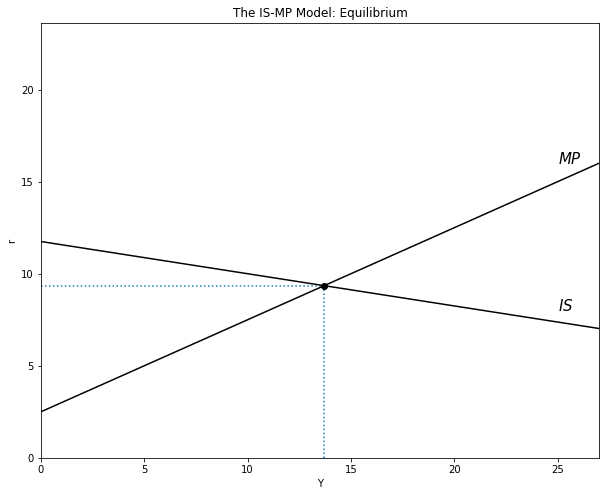

In [145]:
class IS_MP_equilibrium:
    @staticmethod
    def calc_optimal_Y(c_bar=0, i_bar=0, alpha=0, t=0, g=0, d=0, n_pi=0, pi=0, a=0, gamma=0, n_y=0):
        y_star = (((c_bar + i_bar - alpha*t + g)/d)-(n_pi*pi)-a-gamma)/(n_y + ((1-alpha)/d))
        return y_star
    
    @staticmethod
    def calc_optimal_i(optimal_y=0, n_pi=0, pi=0, a=0, gamma=0, n_y=0):
        i_star = a + gamma + n_y*optimal_y + n_pi*pi
        return i_star 

y_eq = IS_MP_equilibrium.calc_optimal_Y(c_bar, i_bar, mpc, t, g, d, n_pi, pi, a, gamma, n_y)
i_eq = IS_MP_equilibrium.calc_optimal_i(y_eq, n_pi, pi, a, gamma, n_y)

v = [0, np.max(Y)*0.27, 0, np.max(i_MP)*.45] # Set the axes range
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="The IS-MP Model: Equilibrium", xlabel=r'Y', ylabel=r'r')
ax.plot(Y, i_MP, "k-")
ax.plot(Y, i_IS, "k-")
plt.axis(v) 
ax.text(np.max(Y)*0.25, 16, "$MP$", fontsize=15) # add text describing the MP curve
ax.text(np.max(Y)*0.25, 8, "$IS$", fontsize=15) # add text describing the IS curve
ax.vlines(x=y_eq,ymin=0,ymax=i_eq, color='tab:blue', linestyles='dotted')
plt.hlines(y=i_eq, xmin=0, xmax=y_eq, color='tab:blue', linestyles='dotted')
ax.plot(y_eq, i_eq,'ro',color='black') # a black dot

# The Aggregate Demand Curve

The Aggregate Demand (AD) curve can be derived from the IS-MP curve. It is important to note that whenever there is an increase in the inflation, the real interest rate set by the central bank also increases. This leads to a movement along the IS curve, causing a decline in output. 

I created a class that calculates the optimal output given the level of inflation which is a numpy array. The calculation calls the `calc_optimal_Y` method from the `IS_MP_equilibrium` class. Next, I plot the outputs,

Text(7.877777777777777, 10.5, '$(Y_1, \\pi_1)$')

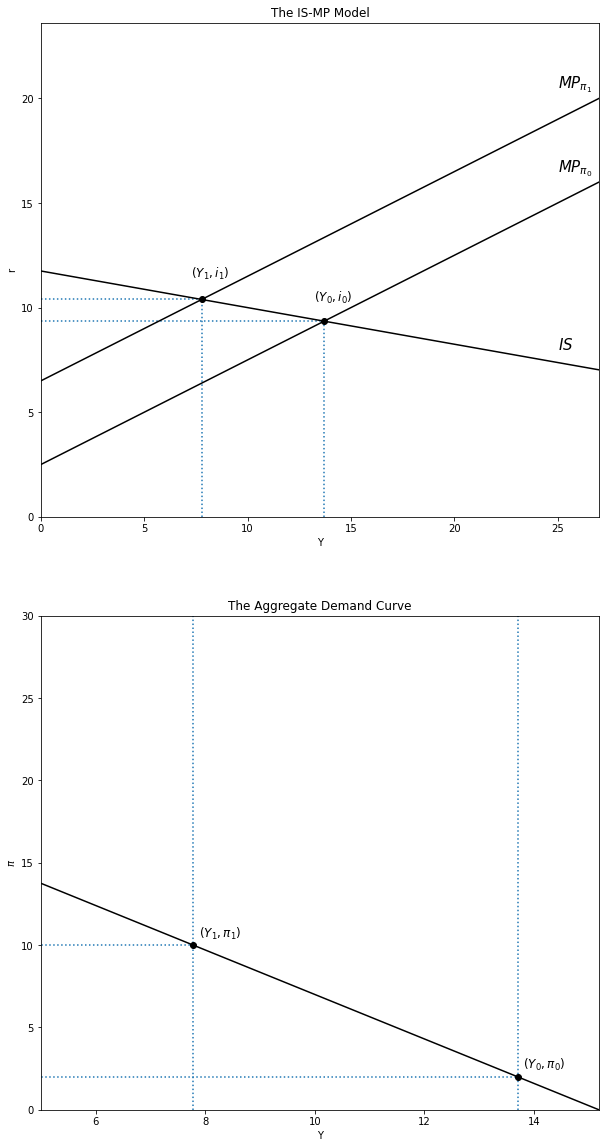

In [227]:
class AD_curve:
    def __init__(self, pi_):
        self.pi_ = pi_
        self.y_opts = [] # empty list to append optimal output values
        # arrays of output
        self.Y_max = 100 # max level of output
        self.Y = np.arange(Y_max+1) # Numpy array for Y
        # parameters for the IS curve
        self.t = 10 # tax level
        self.mpc = 0.3 # marginal propensity to consume
        self.c_bar = 15 # autonomous consumption
        self.i_bar = 15 # investment when i = 0
        self.g = 20 # government expenditures
        self.d = 4 # interest rate sensitivity of Investment
        # parameters for the MP curve
        self.a = 1 # intercept term
        self.gamma = 0.5 # marginal product of capital
        self.n_y = 0.5 # policymaker response to the level of Y
        self.n_pi = 0.5 # policymaker response to the level of pi
        # call calculate AD 
        self.calc_AD()
    def calc_AD(self):
        """
        Loops through numpy arrays and calculates the optimal Y and optimal i that corresponds to the level of inflation
        """
        for pi in self.pi_:
            y_eq = IS_MP_equilibrium.calc_optimal_Y(self.c_bar, self.i_bar, self.mpc, self.t, self.g, self.d, self.n_pi, pi, self.a, self.gamma, self.n_y)
            self.y_opts.append(y_eq)
            

pi_max = 30
pi_ = np.arange(pi_max+1) # Numpy array for inflation
AD_curve = AD_curve(pi_) # create instance of AD_curve class
# call the attribute of AD_curve that correspond to the optimal 'y'
y_opts = AD_curve.y_opts 

Y_max = 100 # max level of output
Y = np.arange(Y_max+1) # Numpy array for Y

y_eq_0 = IS_MP_equilibrium.calc_optimal_Y(c_bar, i_bar, mpc, t, g, d, n_pi, pi, a, gamma, n_y)
i_eq_0 = IS_MP_equilibrium.calc_optimal_i(y_eq_0, n_pi, pi, a, gamma, n_y)

# create a second MP curve with a different inflation value
pi_1 = 10
MP_ = MP_curve(a, gamma, n_y, n_pi, pi_1, Y) 
i_MP_ = MP_.i_arrays_MP() # call i_arrays to obtain arrays for plotting
# calculate optimal values with different inflation value
y_eq_1 = IS_MP_equilibrium.calc_optimal_Y(c_bar, i_bar, mpc, t, g, d, n_pi, pi_1, a, gamma, n_y)
i_eq_1 = IS_MP_equilibrium.calc_optimal_i(y_eq_1, n_pi, pi_1, a, gamma, n_y)

# plot the results
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 20))
v_0 = [0, np.max(Y)*0.27, 0, np.max(i_MP)*.45] # Set the axes range
ax[0].set(title="The IS-MP Model", xlabel=r'Y', ylabel=r'r')
ax[0].plot(Y, i_MP, "k-")
ax[0].plot(Y, i_MP_, "k-")
ax[0].plot(Y, i_IS, "k-")
ax[0].axis(v_0) 
ax[0].text(np.max(Y)*0.25, 16.5, "$MP_{\pi_{0}}$", fontsize=15) # add text describing the MP curve
ax[0].text(np.max(Y)*0.25, 20.5, "$MP_{\pi_{1}}$", fontsize=15) # add text describing the MP curve (at higher inflation value)
ax[0].text(np.max(Y)*0.25, 8, "$IS$", fontsize=15) # add text describing the IS curve
ax[0].vlines(x=y_eq_0,ymin=0,ymax=i_eq, color='tab:blue', linestyles='dotted')
ax[0].hlines(y=i_eq_0, xmin=0, xmax=y_eq, color='tab:blue', linestyles='dotted')
ax[0].vlines(x=y_eq_1,ymin=0,ymax=i_eq_1, color='tab:blue', linestyles='dotted')
ax[0].hlines(y=i_eq_1, xmin=0, xmax=y_eq_1, color='tab:blue', linestyles='dotted')
ax[0].plot(y_eq, i_eq,'ro',color='black') # a black dot
ax[0].plot(y_eq_1, i_eq_1,'ro',color='black') # a black dot (equilibrium at higher inflation value)
ax[0].text(y_eq-0.5, i_eq*1.10, f'$(Y_{0}, i_{0})$', fontsize=12)
ax[0].text(y_eq_1-0.5, i_eq_1*1.10, f'$(Y_{1}, i_{1})$', fontsize=12)
v_1 = [5, max(y_opts), 0, pi_max]
ax[1].set(title="The Aggregate Demand Curve", xlabel=r'Y', ylabel=r'$\pi$')
ax[1].plot(y_opts, pi_, "k-")
ax[1].axis(v_1) 
ax[1].vlines(x=y_eq_0, ymin=0, ymax=pi_max, color='tab:blue', linestyles='dotted')
ax[1].vlines(x=y_eq_1, ymin=0, ymax=pi_max, color='tab:blue', linestyles='dotted')
ax[1].hlines(y=pi, xmin=0, xmax=y_eq_0, color='tab:blue', linestyles='dotted')
ax[1].hlines(y=pi_1, xmin=0, xmax=y_eq_1, color='tab:blue', linestyles='dotted')
ax[1].plot(y_eq_0, pi,'ro',color='black') # a black dot
ax[1].plot(y_eq_1, pi_1,'ro',color='black') # a black dot (equilibrium at higher inflation value)
ax[1].text(y_eq_0+0.1, pi*1.25, f'$(Y_{0}, \pi_{0})$', fontsize=12)
ax[1].text(y_eq_1+0.1, pi_1*1.05, f'$(Y_{1}, \pi_{1})$', fontsize=12)